In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

In [5]:
sep_coin = cv2.imread("../DATA/pennies.jpg")

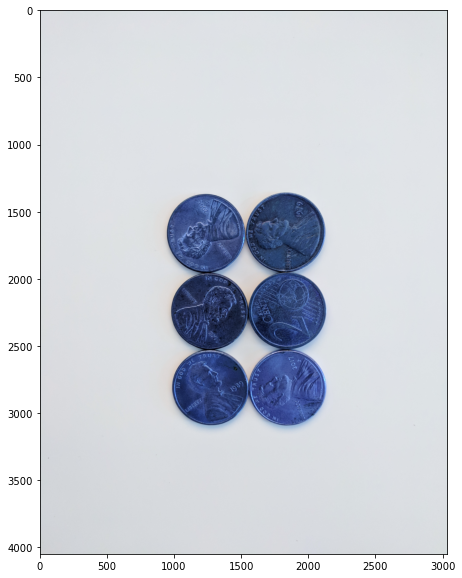

In [11]:
display(sep_coin)

In [12]:
#Median blur will help to not get the thing that we don't need

#grayscale blur

#Binart threshold

#contours

In [13]:
sep_blur = cv2.medianBlur(sep_coin, 25)

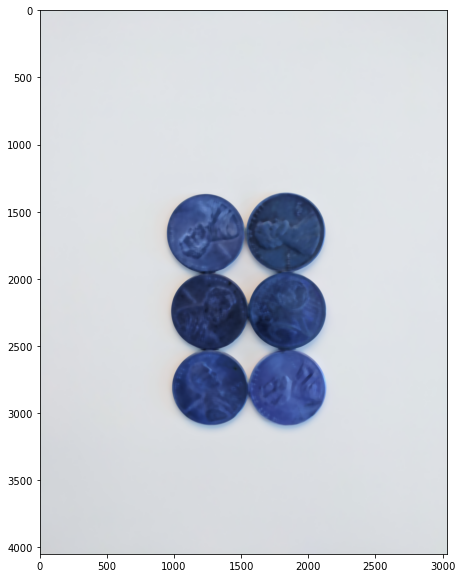

In [16]:
display(sep_blur)

In [18]:
gray_sep_coin = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

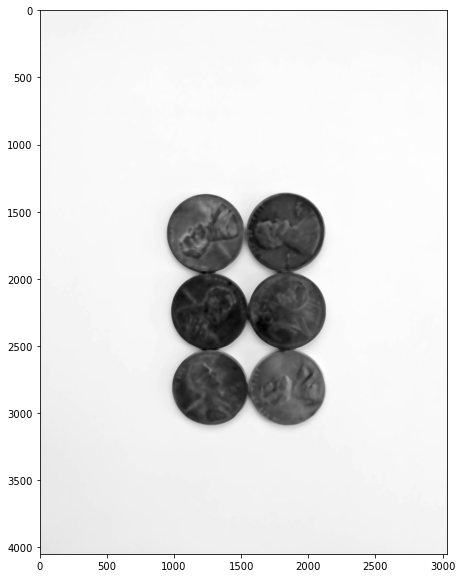

In [26]:
display(gray_sep_coin, cmap="gray")

In [20]:
ret, sep_thresh = cv2.threshold(gray_sep_coin, 160, 255, cv2.THRESH_BINARY_INV)

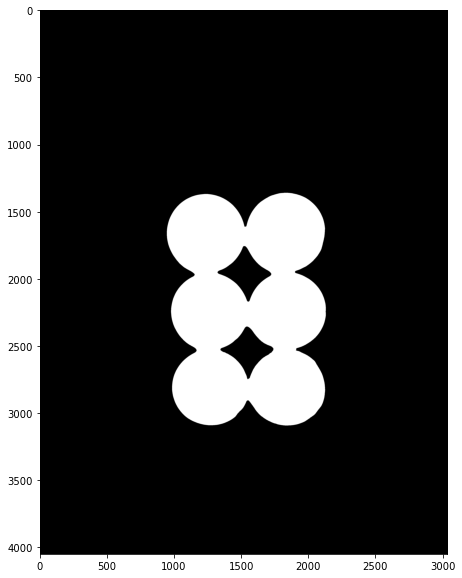

In [21]:
display(sep_thresh)

In [22]:
image, contours, hieraracy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [27]:
for i in range(len(contours)) :
    if hieraracy[0][i][3] == -1 :
        cv2.drawContours(sep_coin, contours, i, (255,0,0), 10)

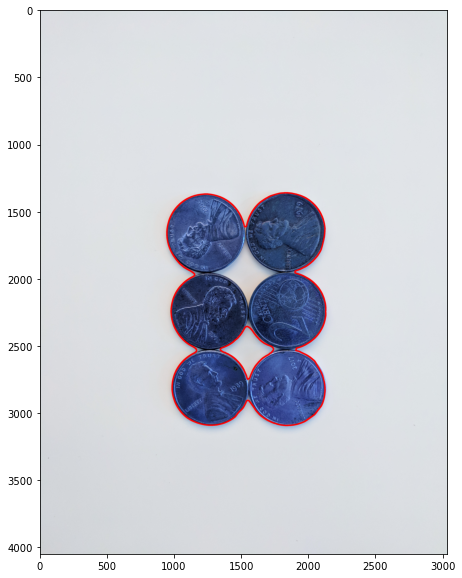

In [28]:
display(sep_coin)

In [29]:
img = cv2.imread("../DATA/pennies.jpg")

In [30]:
img = cv2.medianBlur(img, 35)

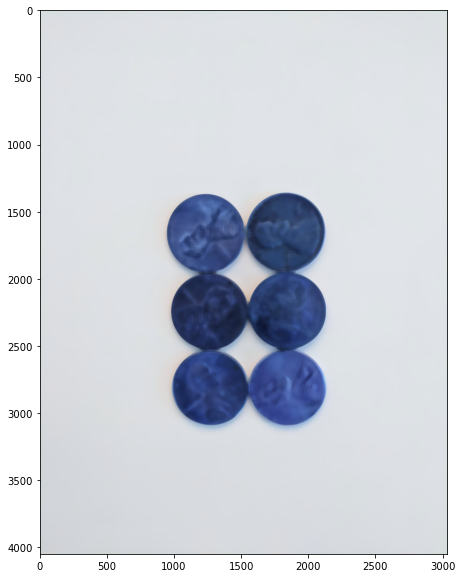

In [31]:
display(img)

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [34]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

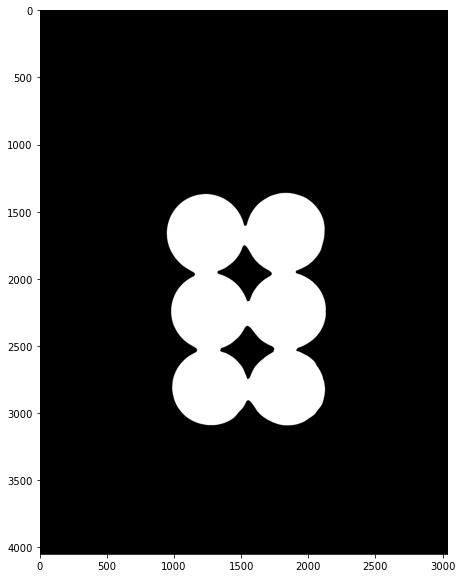

In [35]:
display(thresh)

In [36]:
#NOISE REMOVAL (optional)
kernel = np.ones((3,3), np.uint8)

In [37]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [39]:
openimg = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel,iterations=2)

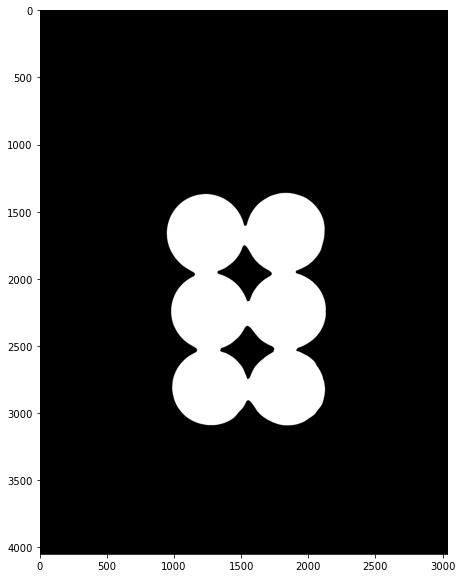

In [40]:
display(openimg)

In [41]:
img = cv2.imread("../DATA/pennies.jpg")

In [42]:
img = cv2.medianBlur(img, 35)

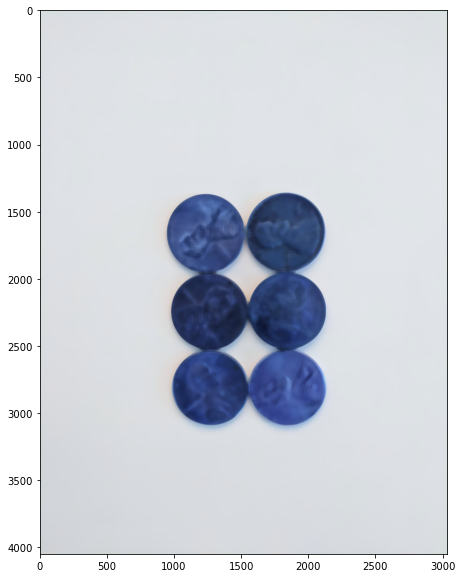

In [43]:
display(img)

In [44]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [47]:
res, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

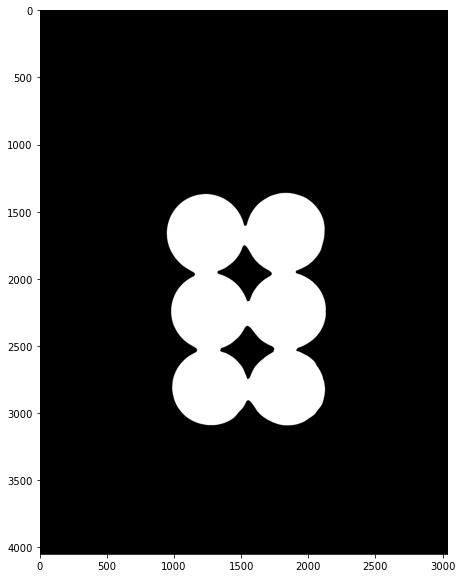

In [48]:
display(thresh)

In [49]:
#NOISE REMOVAL 
kernel = np.ones((3,3),np.uint8)

In [50]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [51]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

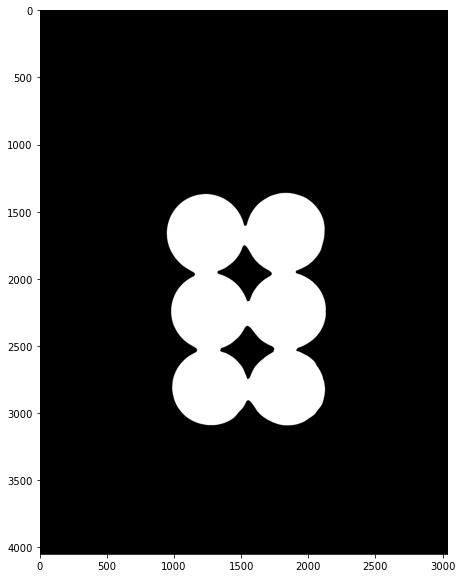

In [59]:
display(opening,cmap="gray")

In [60]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

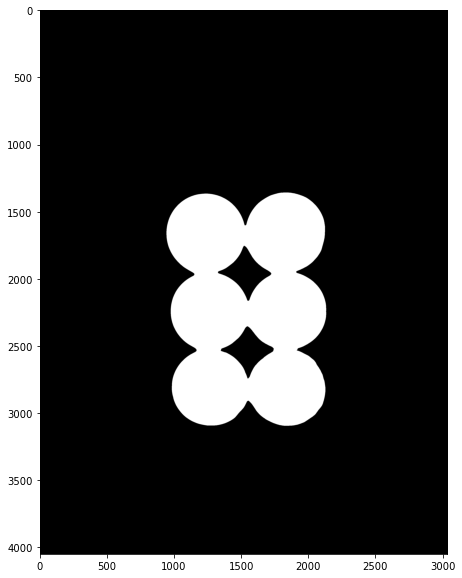

In [61]:
display(sure_bg,cmap='gray')

In [53]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

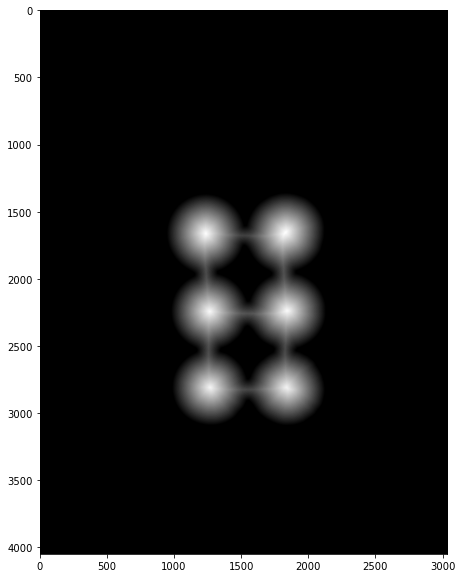

In [55]:
display(dist_transform)

In [56]:
ret, sure_bg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255,0)

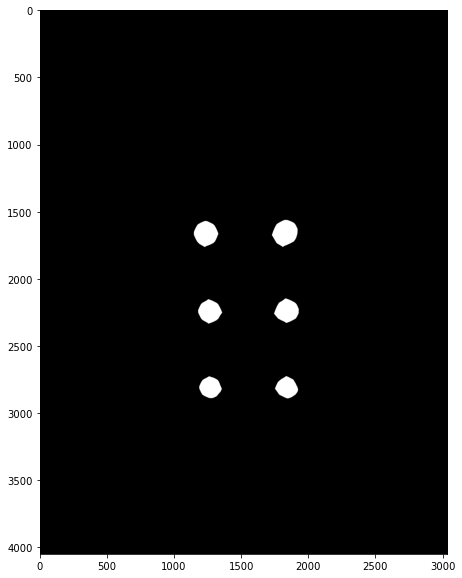

In [62]:
display(sure_forground, cmap="gray")

In [63]:
#FIND UNKNOWN REGION
sure_forground = np.uint8(sure_forground)

In [64]:
unknown = cv2.subtract(sure_bg,sure_forground)

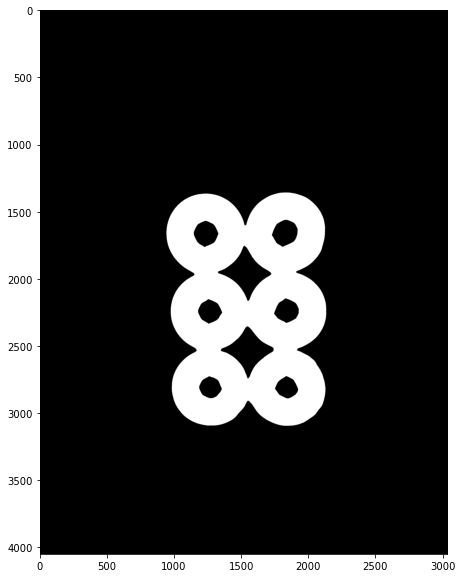

In [65]:
display(unknown)

In [66]:
ret, markers = cv2.connectedComponents(sure_forground)

In [68]:
markers = markers + 1

In [69]:
markers[unknown==255] = 0

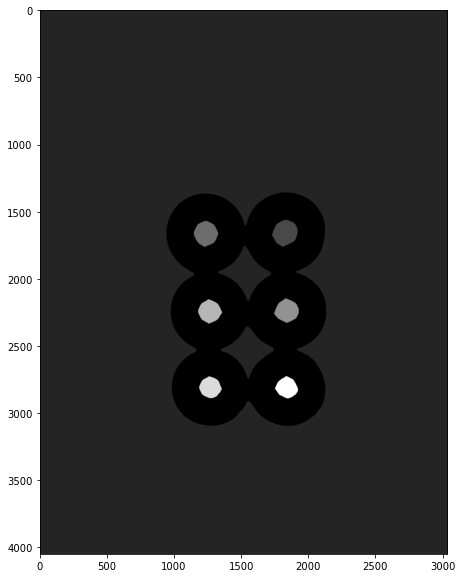

In [70]:
display(markers)

In [71]:
markers = cv2.watershed(img, markers)

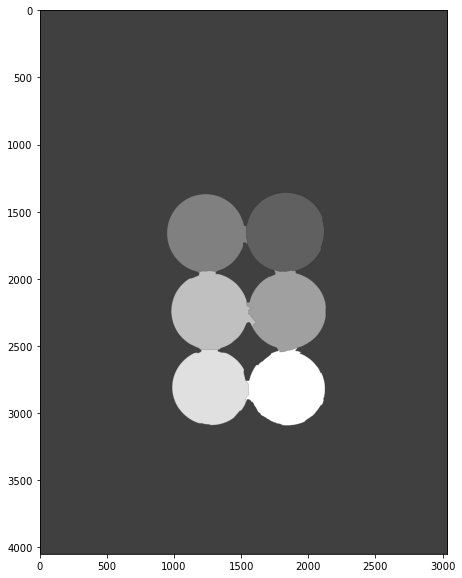

In [72]:
display(markers)

In [76]:
image, contours, hieraracy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)) :
    if hieraracy[0][i][3] == -1 :
        cv2.drawContours(sep_coin, contours, i, (255,0,0), 10)

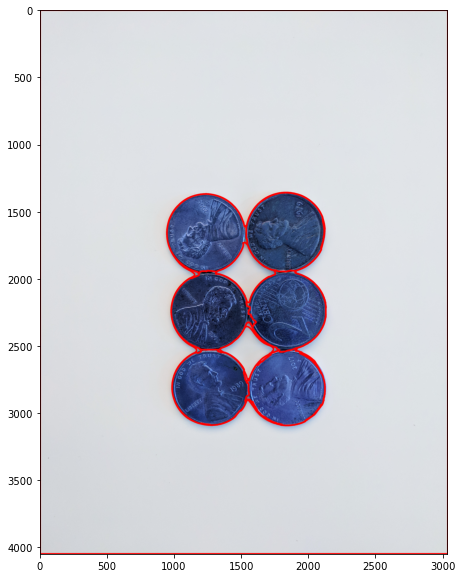

In [78]:
display(sep_coin)

In [ ]:
sure_fg 